In [1]:
!wget https://live.staticflickr.com/8043/8394379683_a49795d0e3_b.jpg

--2024-10-27 07:50:45--  https://live.staticflickr.com/8043/8394379683_a49795d0e3_b.jpg
Resolving live.staticflickr.com (live.staticflickr.com)... 18.65.5.93, 2600:9000:2366:4600:0:5a51:64c9:c681, 2600:9000:2366:4e00:0:5a51:64c9:c681, ...
Connecting to live.staticflickr.com (live.staticflickr.com)|18.65.5.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘8394379683_a49795d0e3_b.jpg’

8394379683_a49795d0     [ <=>                ] 149.00K  --.-KB/s    in 0.02s   

2024-10-27 07:50:46 (8.95 MB/s) - ‘8394379683_a49795d0e3_b.jpg’ saved [152571]



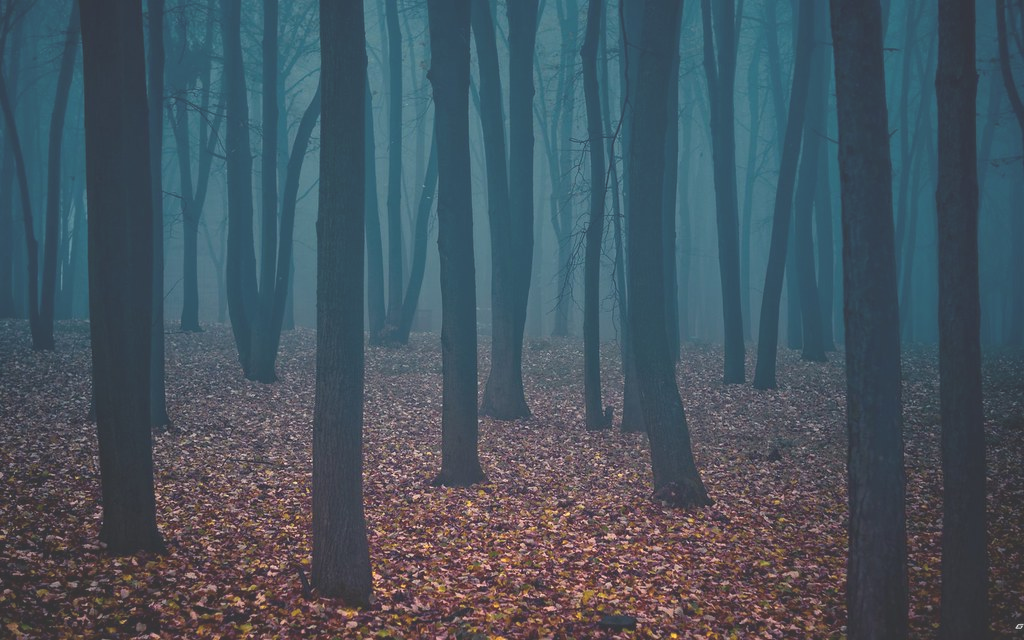

In [2]:
import numpy as np
from numba import cuda
from PIL import Image
import time
from IPython.display import display

# Define the kernel for adjusting brightness
@cuda.jit
def adjust_brightness_kernel(input_image, output_image, brightness_value):
    # Get the position of the current thread in the grid
    x, y = cuda.grid(2)

    # Check if within image bounds
    if x < input_image.shape[0] and y < input_image.shape[1]:
        for channel in range(3):  # Loop through the RGB channels
            # Adjust the brightness and clip the values to keep them in the 0-255 range
            output_image[x, y, channel] = min(max(input_image[x, y, channel] + brightness_value, 0), 255)

# Host function to call the CUDA kernel
def adjust_brightness(input_image, brightness_value=50):
    # Allocate space for the output image with the same shape as input
    output_image = np.zeros_like(input_image, dtype=np.uint8)

    # Define grid and block dimensions
    threads_per_block = (16, 16)
    blocks_per_grid_x = (input_image.shape[0] + threads_per_block[0] - 1) // threads_per_block[0]
    blocks_per_grid_y = (input_image.shape[1] + threads_per_block[1] - 1) // threads_per_block[1]

    # Transfer the image to the GPU
    d_input_image = cuda.to_device(input_image)
    d_output_image = cuda.to_device(output_image)

    # Launch the kernel
    adjust_brightness_kernel[(blocks_per_grid_x, blocks_per_grid_y), threads_per_block](d_input_image, d_output_image, brightness_value)

    # Copy the result back to the host
    return d_output_image.copy_to_host()

# Example usage
if __name__ == "__main__":
    # Create a sample RGB image (512x512x3) for demonstration
    # input_image = np.random.randint(0, 255, (512, 512, 3), dtype=np.uint8)
    img = Image.open('/content/8394379683_a49795d0e3_b.jpg')
    input_image = np.array(img)


    # Define the brightness adjustment value (positive to brighten, negative to darken)
    brightness_value = 50  # Increase brightness by 50

    # Apply the brightness adjustment
    output_array = adjust_brightness(input_image, brightness_value=brightness_value)

    output_img = Image.fromarray(output_array)

    # Display the grayscale image using IPython
    display(output_img)


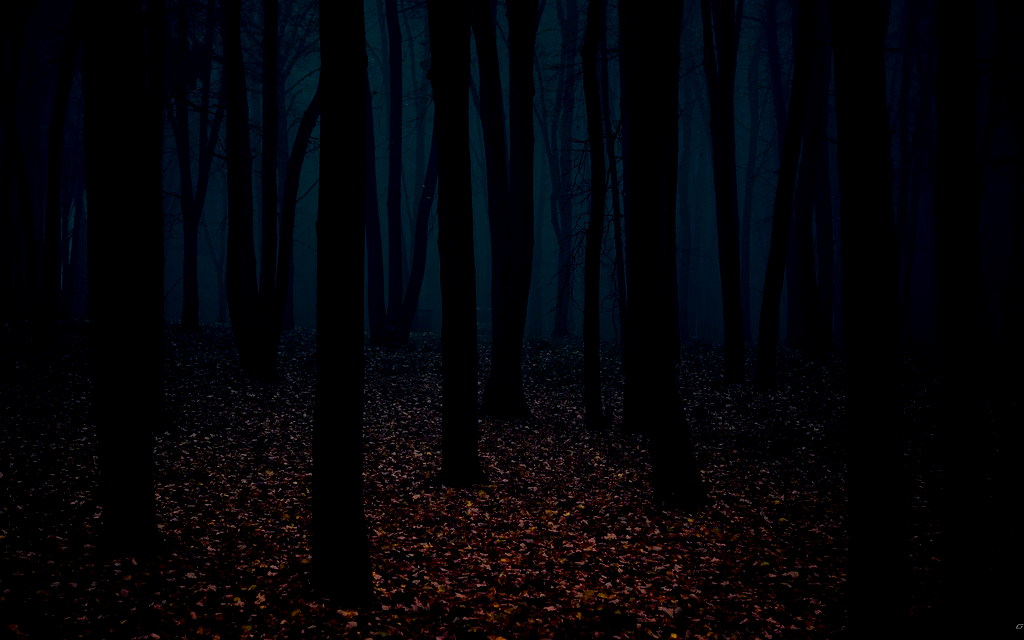

In [3]:
# Example usage
if __name__ == "__main__":
    # Create a sample RGB image (512x512x3) for demonstration
    # input_image = np.random.randint(0, 255, (512, 512, 3), dtype=np.uint8)
    img = Image.open('/content/8394379683_a49795d0e3_b.jpg')
    input_image = np.array(img)


    # Define the brightness adjustment value (positive to brighten, negative to darken)
    brightness_value = -50  # decrease brightness by 50

    # Apply the brightness adjustment
    output_array = adjust_brightness(input_image, brightness_value=brightness_value)

    output_img = Image.fromarray(output_array)

    # Display the grayscale image using IPython
    display(output_img)

# Blending images

In [5]:
!wget https://easy-peasy.ai/cdn-cgi/image/quality=80,format=auto,width=700/https://fdczvxmwwjwpwbeeqcth.supabase.co/storage/v1/object/public/images/8357c0ce-cedc-4643-a6ae-e61e6afac2d5/4488e414-3126-49c4-bf7a-aeaec7a00f46.png

--2024-10-27 08:02:40--  https://easy-peasy.ai/cdn-cgi/image/quality=80,format=auto,width=700/https://fdczvxmwwjwpwbeeqcth.supabase.co/storage/v1/object/public/images/8357c0ce-cedc-4643-a6ae-e61e6afac2d5/4488e414-3126-49c4-bf7a-aeaec7a00f46.png
Resolving easy-peasy.ai (easy-peasy.ai)... 172.67.74.242, 104.26.15.22, 104.26.14.22, ...
Connecting to easy-peasy.ai (easy-peasy.ai)|172.67.74.242|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75900 (74K) [image/jpeg]
Saving to: ‘4488e414-3126-49c4-bf7a-aeaec7a00f46.png’

4488e414-3126-49c4- 100%[===================>]  74.12K  --.-KB/s    in 0.02s   

2024-10-27 08:02:41 (4.53 MB/s) - ‘4488e414-3126-49c4-bf7a-aeaec7a00f46.png’ saved [75900/75900]



In [6]:
!wget https://easy-peasy.ai/cdn-cgi/image/quality=80,format=auto,width=700/https://fdczvxmwwjwpwbeeqcth.supabase.co/storage/v1/object/public/images/7e04c626-c0de-4f39-8c14-410403bc5fb0/37a38d64-7b9a-4483-8408-5fc30092f1ff.png

--2024-10-27 08:02:58--  https://easy-peasy.ai/cdn-cgi/image/quality=80,format=auto,width=700/https://fdczvxmwwjwpwbeeqcth.supabase.co/storage/v1/object/public/images/7e04c626-c0de-4f39-8c14-410403bc5fb0/37a38d64-7b9a-4483-8408-5fc30092f1ff.png
Resolving easy-peasy.ai (easy-peasy.ai)... 172.67.74.242, 104.26.15.22, 104.26.14.22, ...
Connecting to easy-peasy.ai (easy-peasy.ai)|172.67.74.242|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44754 (44K) [image/jpeg]
Saving to: ‘37a38d64-7b9a-4483-8408-5fc30092f1ff.png’

37a38d64-7b9a-4483- 100%[===================>]  43.71K  --.-KB/s    in 0.007s  

2024-10-27 08:02:58 (6.24 MB/s) - ‘37a38d64-7b9a-4483-8408-5fc30092f1ff.png’ saved [44754/44754]



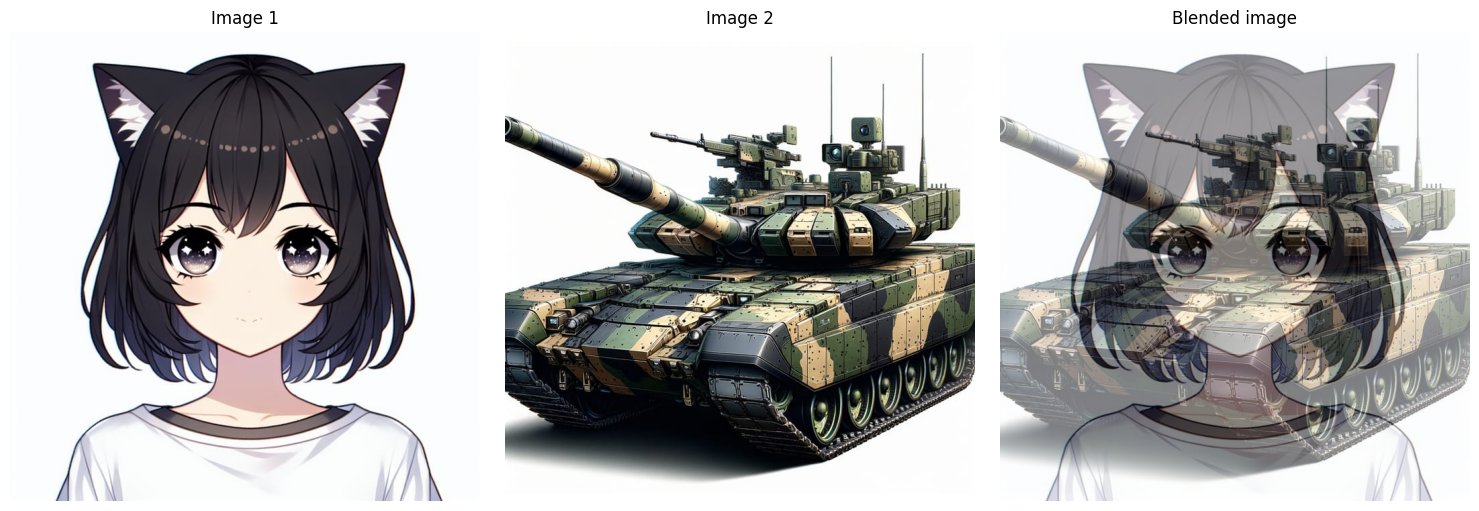

In [7]:
import numpy as np
from numba import cuda
import matplotlib.pyplot as plt

@cuda.jit
def blend_images_cuda(image1, image2, output, weight1, weight2):
    # Get the thread's unique position in the image
    height, width = output.shape[0], output.shape[1]
    x, y = cuda.grid(2)

    if x < width and y < height:
        # Blend the RGB values for the corresponding pixel
        for c in range(3):  # RGB channels
            output[y, x, c] = (weight1 * image1[y, x, c] + weight2 * image2[y, x, c]) / (weight1 + weight2)

def blend_images(image1, image2, weight1, weight2):
    # Ensure input images are the same size
    assert image1.shape == image2.shape, "Input images must have the same dimensions."

    height, width, channels = image1.shape
    output = np.zeros_like(image1, dtype=np.uint8)

    # Define CUDA grid dimensions
    threads_per_block = (16, 16)
    blocks_per_grid_x = (width + (threads_per_block[0] - 1)) // threads_per_block[0]
    blocks_per_grid_y = (height + (threads_per_block[1] - 1)) // threads_per_block[1]
    blocks_per_grid = (blocks_per_grid_x, blocks_per_grid_y)

    # Transfer data to the device
    d_image1 = cuda.to_device(image1)
    d_image2 = cuda.to_device(image2)
    d_output = cuda.to_device(output)

    # Launch the kernel
    blend_images_cuda[blocks_per_grid, threads_per_block](d_image1, d_image2, d_output, weight1, weight2)

    # Copy the result back to host
    d_output.copy_to_host(output)

    return output

# Example usage
if __name__ == "__main__":
    # Load your images as NumPy arrays (example shape: (height, width, 3))
    # image1 = np.random.randint(0, 255, (512, 512, 3), dtype=np.uint8)
    # image2 = np.random.randint(0, 255, (512, 512, 3), dtype=np.uint8)
    img1 = Image.open('/content/37a38d64-7b9a-4483-8408-5fc30092f1ff.png')
    image1 = np.array(img1)

    img2 = Image.open('/content/4488e414-3126-49c4-bf7a-aeaec7a00f46.png')
    image2 = np.array(img2)


    weight1 = 0.5
    weight2 = 0.5

    blended_img = blend_images(image1, image2, weight1, weight2)



    # Create a figure and a grid of subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Display each image
    axes[0].imshow(image1)
    axes[0].axis('off')  # Hide axes for a cleaner look
    axes[0].set_title('Image 1')

    axes[1].imshow(image2)
    axes[1].axis('off')
    axes[1].set_title('Image 2')

    axes[2].imshow(blended_img)
    axes[2].axis('off')
    axes[2].set_title('Blended image')

    # Show the images
    plt.tight_layout()
    plt.show()


